In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon
import geopandas as gpd
from pathlib import Path

In [2]:
all_dates = pd.date_range(start='2022-07-01', end='2024-12-1', freq='D').strftime('%Y-%m-%d')

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

def create_squares_date_range(index):

    dates = pd.date_range(start=index[0], end=index[-1], freq='D')
    
    dates_df = pd.DataFrame({'date': dates})
    dates_df['year'] = dates_df['date'].dt.year
    dates_df['month'] = dates_df['date'].dt.month
    dates_df['day'] = dates_df['date'].dt.day
    
    dates_df['year_month'] = dates_df['date'].dt.to_period('M')
    
    months = dates_df['year_month'].drop_duplicates().sort_values().tolist()
    month_indices = {month: idx for idx, month in enumerate(months)}

    polygons = []
    for _, row in dates_df.iterrows():
        # Get the position of the square in the grid
        month_idx = month_indices[row['year_month']]
        day_idx = row['day'] - 1  # Days start from 1, so subtract 1 for zero-based index
        
        x0 = day_idx      # Column (x-coordinate)
        y0 = month_idx    # Row (y-coordinate)
        
        # Create the square polygon
        square = Polygon([
            (x0, y0),
            (x0 + 1, y0),
            (x0 + 1, y0 + 1),
            (x0, y0 + 1),
            (x0, y0)
        ])
        polygons.append(square)
    
    return gpd.GeoSeries(
        polygons,
        index=index
    )


In [ ]:
results_tracker = gpd.GeoDataFrame(
    False,
    index=all_dates,
    columns=['summary', 'networks', 'solved', 'base'],
    geometry=create_squares_date_range(all_dates)
)

In [ ]:
file_mapper = {
    'summary': str(Path.cwd().parent / 'results' / '{}' / 'system_cost_summary_flex.csv'),
    'networks': str(Path.cwd().parent / 'results' / '{}' / 'national_flex_s_nodal.nc'),
    'solved': str(Path.cwd().parent / 'results' / '{}' / 'national_flex_s_nodal_solved.nc'),
    'base': str(Path.cwd().parent / 'data' / 'base' / '{}' / 'offers.csv'),
}

for key, fn in file_mapper.items():
    results_tracker[key] = (
        results_tracker
        .index
        .map(
            lambda x: os.path.isfile(fn.format(x))
            )
        .astype(float)
    )

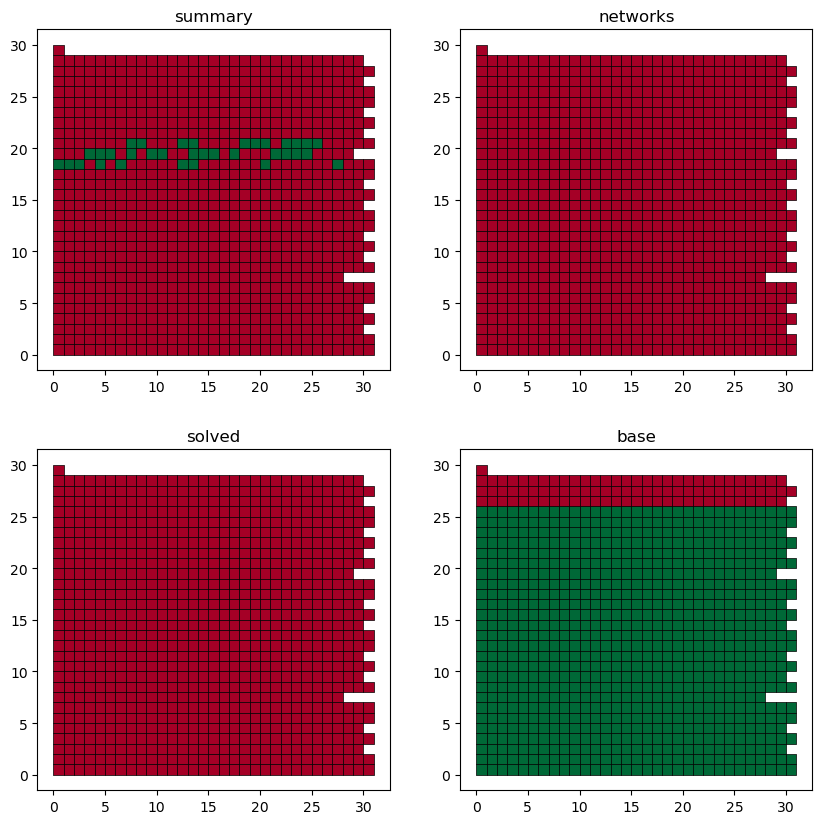

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

kwargs = dict(edgecolor='black', linewidth=0.5,)

for col, ax in zip(results_tracker.columns, axs.flatten()):
    results_tracker.plot(column=col, ax=ax, cmap='RdYlGn', **kwargs)
    ax.set_title(col)

plt.show()

In [ ]:
import pypsa

n = pypsa.Network(Path.cwd().parent / 'hold.nc')

INFO:pypsa.io:Imported network hold.nc has buses, carriers, generators, links, loads, storage_units


In [61]:
ic = n.links.loc[n.links.carrier == 'interconnector'].index

n.links.loc[ic, 'p_nom']

Link
BritNed     1044.0
IFA1        2000.0
IFA2        2002.0
Nemo        1024.0
Viking      1404.0
ElecLink    1497.0
NSL         1400.0
Name: p_nom, dtype: float64

In [63]:
n.links_t.p_set[ic].abs().max()

Link
BritNed     1044.0
IFA1        2000.0
IFA2        2002.0
Nemo        1024.0
Viking      1404.0
ElecLink    1497.0
NSL         1400.0
dtype: float64

In [71]:
n.links_t.p_max_pu.head()

Link,13161,6241,6146,6238,14109,6139,11758,8009,11778,11780,5225,5203,11528,11764,6203,5207,6121,12746,11742
snapshot,,,,,,,,,,,,,,,,,,,
2024-03-16 00:00:00,0.40101,0.40101,0.40101,0.40101,0.423691,0.423691,0.423691,0.351129,0.351129,0.351129,0.351129,0.169601,0.169601,0.169601,0.169601,0.169601,0.724338,0.724338,0.724338
2024-03-16 00:30:00,0.40101,0.40101,0.40101,0.40101,0.423691,0.423691,0.423691,0.351129,0.351129,0.351129,0.351129,0.169601,0.169601,0.169601,0.169601,0.169601,0.724338,0.724338,0.724338
2024-03-16 01:00:00,0.40101,0.40101,0.40101,0.40101,0.423691,0.423691,0.423691,0.351129,0.351129,0.351129,0.351129,0.169601,0.169601,0.169601,0.169601,0.169601,0.724338,0.724338,0.724338
2024-03-16 01:30:00,0.40101,0.40101,0.40101,0.40101,0.423691,0.423691,0.423691,0.351129,0.351129,0.351129,0.351129,0.169601,0.169601,0.169601,0.169601,0.169601,0.724338,0.724338,0.724338
2024-03-16 02:00:00,0.40101,0.40101,0.40101,0.40101,0.423691,0.423691,0.423691,0.351129,0.351129,0.351129,0.351129,0.169601,0.169601,0.169601,0.169601,0.169601,0.724338,0.724338,0.724338
